In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('Titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [8]:
df.drop(['Cabin','PassengerId','Name','Ticket'], axis='columns', inplace=True)

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
df.shape

(891, 8)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(712, 8)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
survived_mask = df["Survived"] == 1
survived_passengers = df[survived_mask]

In [15]:
survived_by_age = survived_passengers.groupby("Age")["Survived"].count()


In [16]:
survived_by_age

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
58.00    3
60.00    2
62.00    1
63.00    2
80.00    1
Name: Survived, Length: 65, dtype: int64

In [17]:
df['Age'].min()

0.42

In [18]:
df['Survived'].sum()

288

In [19]:
df[(df['Age']<=20) & (df['Survived']==1)].shape[0]

82

In [20]:
df.groupby('Sex')['Survived'].size()

Sex
female    259
male      453
Name: Survived, dtype: int64

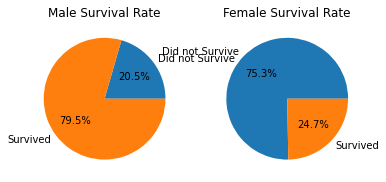

In [21]:
import matplotlib.pyplot as plt


# Group passengers by gender and survival status, and count number of passengers in each group
gender_survival_counts = df.groupby(['Sex', 'Survived']).size()
gender_survival_counts
# Extract counts for males and females
male_survival_counts = gender_survival_counts.loc[('male', 1)], gender_survival_counts.loc[('male', 0)]
female_survival_counts = gender_survival_counts.loc[('female', 1)], gender_survival_counts.loc[('female', 0)]

# Plot pie chart for males
plt.subplot(1, 2, 1)
plt.pie(male_survival_counts, labels=['Did not Survive', 'Survived'], autopct='%1.1f%%')
plt.title('Male Survival Rate')

# Plot pie chart for females
plt.subplot(1, 2, 2)
plt.pie(female_survival_counts, labels=['Did not Survive', 'Survived'], autopct='%1.1f%%')
plt.title('Female Survival Rate')
plt.show()


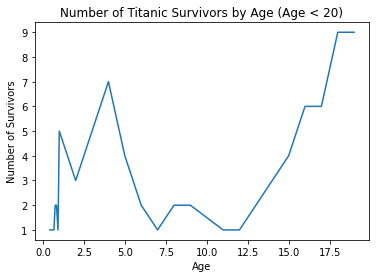

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S
22,1,3,female,15.0,0,0,8.0292,Q
39,1,3,female,14.0,1,0,11.2417,C
43,1,2,female,3.0,1,2,41.5792,C
...,...,...,...,...,...,...,...,...
853,1,1,female,16.0,0,1,39.4000,S
855,1,3,female,18.0,0,1,9.3500,S
869,1,3,male,4.0,1,1,11.1333,S
875,1,3,female,15.0,0,0,7.2250,C


In [22]:
import matplotlib.pyplot as plt
survived_mask = df["Survived"] == 1
age_mask = df["Age"] < 20
young_survivors = df[survived_mask & age_mask]
survived_by_age = young_survivors.groupby("Age")["Survived"].count()
survived_by_age = survived_by_age.sort_index()
plt.plot(survived_by_age.index, survived_by_age.values)
plt.xlabel("Age")
plt.ylabel("Number of Survivors")
plt.title("Number of Titanic Survivors by Age (Age < 20)")
plt.show()

young_survivors

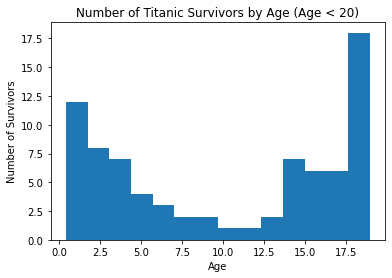

In [23]:
plt.hist(young_survivors["Age"], bins=14)
plt.xlabel("Age")
plt.ylabel("Number of Survivors")
plt.title("Number of Titanic Survivors by Age (Age < 20)")
plt.show()

In [24]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         6
Parch         7
Fare        219
Embarked      3
dtype: int64

In [25]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [26]:
df['Pclass'].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

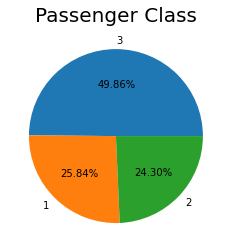

In [27]:
plt.pie(df['Pclass'].value_counts() ,labels=df['Pclass'].value_counts().index,autopct='%1.2f%%')
plt.title('Passenger Class',size=20)
plt.show()

C:\Users\Microsoft\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


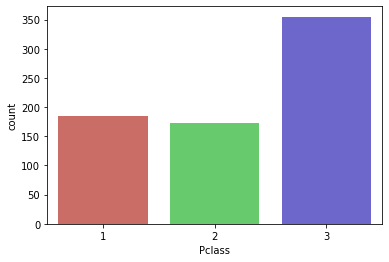

In [28]:
import seaborn as sns
sns.countplot(df['Pclass'],data=df,palette ='hls')
plt.show()

In [29]:
num_people_embarked = df['Embarked'].count()

print("Number of people who embarked on the Titanic:", num_people_embarked)

Number of people who embarked on the Titanic: 712


In [30]:
num_people_embarked_Q = (df['Embarked'] == 'Q').sum()

print("Number of people who embarked at Queenstown (Q):", num_people_embarked_Q)

Number of people who embarked at Queenstown (Q): 28


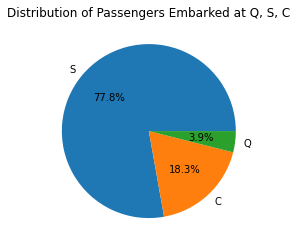

In [31]:
# Filter the DataFrame to get only the rows where Embarked is Q, S, or C
embarked_QSC = df[df['Embarked'].isin(['Q', 'S', 'C'])]

# Count the number of passengers who embarked at Q, S, or C
embarked_counts = embarked_QSC['Embarked'].value_counts()

plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Passengers Embarked at Q, S, C")
plt.show()


In [32]:
# Filter the DataFrame to get only the rows where SibSp is greater than 0 and Survived is 1 (indicating survival)
survived_with_sibsp = df[(df['SibSp'] > 0) & (df['Survived'] == 1)]

# Count the number of people who survived with siblings/spouses
num_survived_with_sibsp = survived_with_sibsp.shape[0]

print("Number of people who survived with siblings/spouses:", num_survived_with_sibsp)


Number of people who survived with siblings/spouses: 115


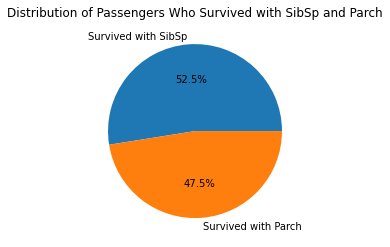

In [33]:
# Filter the DataFrame to get only the rows where SibSp or Parch is greater than 0, and Survived is 1 (indicating survival)
survived_with_sibsp = df[(df['SibSp'] > 0) & (df['Survived'] == 1)]
survived_with_parch = df[(df['Parch'] > 0) & (df['Survived'] == 1)]

# Count the number of people who survived with siblings/spouses and with parents/children
num_survived_with_sibsp = survived_with_sibsp.shape[0]
num_survived_with_parch = survived_with_parch.shape[0]

# Generate a pie chart
labels = ['Survived with SibSp', 'Survived with Parch']
values = [num_survived_with_sibsp, num_survived_with_parch]
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Passengers Who Survived with SibSp and Parch")
plt.show()
